# Intro
This is another linear regression program

I'll be loading a data set with the NHL 2005 draft class inlcuding their rank, weight, and height, and trying to find some correlation.
Then I will use Bootstrapping method with confidence intervals on the parameters and observing if the confidence intervals selected will show a positive relation.
After that I'll be making predictions with the Bootstrapped data and observing it's slope. In the end I'll use my 
fitted `model` to make predictions, and will make a scatter plot of the test data and superimpose the prediction of the model. 

To evaluate this prediction, I'll calculate the r-square value for the out of sample (oos) data.  

I'll be plotting graphs on the way to ensure easy visualization of my data, and what I'm doing.

# Observations Made

## Joint-Scatter Plot
I noticed the dots on the Joint-Scatter Plot form a distinct downward trend, signifying the negative relationship between the two parameters.
The relationship between height and weight  might imply that if you start with a higher base weight (i.e. a higher intercept), then the weight gain for every additional unit increase in height is less, and vice versa.

## Histogram (95% CI)
 The 95% confidence interval for the slope, ranging from around 3.2 to around 5.4-5.7, indicates that we are 95% confident the true population slope lies within this range. This positive interval suggests a significant positive relationship between the two variables. 

## Height vs Weight with Bootstrapped Regression Lines
 We are most uncertain about our prediction at the extreme heights, especially where there are fewer data points. The spread in the prediction of mean weight is lower than the variability of our intercept because the mean weight is influenced by all the data points and is more stable. In contrast, the intercept is more sensitive to changes in the slope, and since they're negatively correlated.




In [2]:
# Add the necessary imports for this homework 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as skm
import sklearn.linear_model
from scipy.stats import t
from sklearn.linear_model import LinearRegression

c:\Users\sohra\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


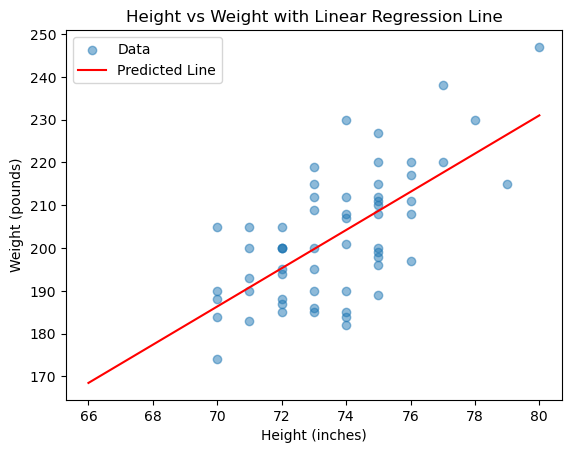

R-squared: 0.4381


In [3]:

# Load data
data = pd.read_csv('hockey_draftees_2005.csv')

X = data[['ht']]
y = data['wt']
model = LinearRegression().fit(X, y)

heights = np.arange(66, 81).reshape(-1, 1)
predicted_weights = model.predict(heights)

# Scatter plot
plt.scatter(data['ht'], data['wt'], label='Data', alpha=0.5)
plt.plot(heights, predicted_weights, color='red', label='Predicted Line')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.legend()
plt.title('Height vs Weight with Linear Regression Line')
plt.show()

# Calculate residuals and r-squared
residuals = y - model.predict(X)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - y.mean())**2)
r_squared = 1 - (ss_res/ss_tot)
print(f"R-squared: {r_squared:.4f}")


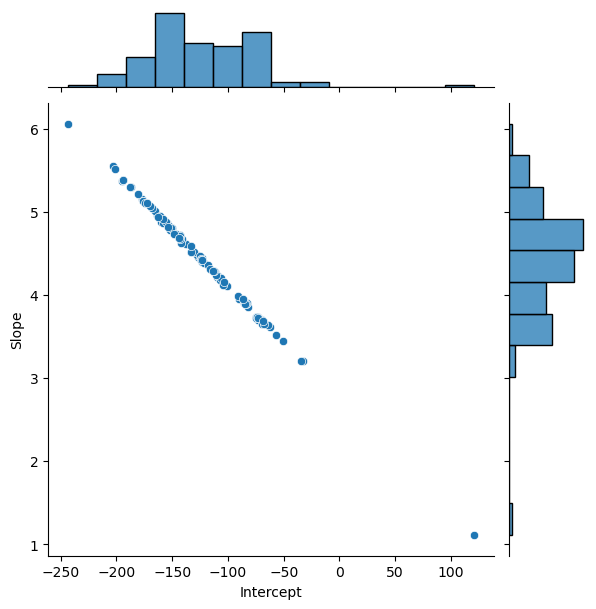

In [4]:
def BootstrapCoef(data, numboot=1000):
    n = len(data)
    theta = np.zeros((numboot, 2))
    
    for i in range(numboot):
        d = data.sample(n, replace=True)
        X = d[['ht']]
        y = d['wt']
        model_boot = LinearRegression().fit(X, y)
        theta[i, 0] = model_boot.intercept_
        theta[i, 1] = model_boot.coef_
        
    return theta

# bootstrap resampling
params = BootstrapCoef(data, 100)

# Joint scatter plot
sns.jointplot(x=params[:, 0], y=params[:, 1], kind='scatter')
plt.xlabel('Intercept')
plt.ylabel('Slope')
plt.show()



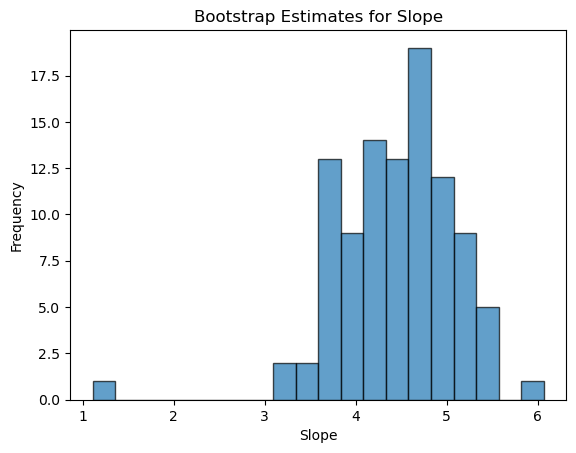

95% Confidence Interval for Slope: (3.3273, 5.4577)


In [5]:
# Histogram
plt.hist(params[:, 1], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.title('Bootstrap Estimates for Slope')
plt.show()

# 95% CI
lower = np.percentile(params[:, 1], 2.5)
upper = np.percentile(params[:, 1], 97.5)
print(f"95% Confidence Interval for Slope: ({lower:.4f}, {upper:.4f})")


c:\Users\sohra\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\sohra\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\sohra\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\sohra\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\sohra\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\sohra\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not ha

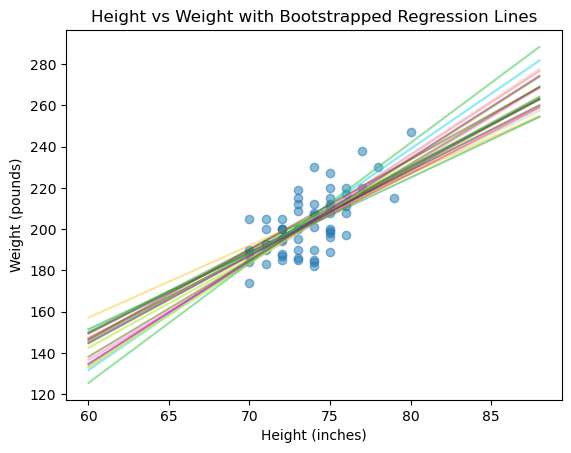

In [6]:
import random
def BootstrapPred(data, numboot=20):
    n = len(data)
    X = data[['ht']]
    y = data['wt']
    heights = np.arange(60, 89).reshape(-1, 1)
    preds = np.zeros((numboot, len(heights)))
    
    for i in range(numboot):
        d = data.sample(n, replace=True)
        X_resampled = d[['ht']]
        y_resampled = d['wt']
        model_boot = LinearRegression().fit(X_resampled, y_resampled)
        preds[i] = model_boot.predict(heights)
        
    return preds

# Predictions from bootstrapped models
predictions = BootstrapPred(data)

plt.scatter(data['ht'], data['wt'], alpha=0.5, label='Data')

for i in range(20):
    color = (random.random(), random.random(), random.random())
    plt.plot(np.arange(60, 89), predictions[i], color= color, alpha=0.5)

plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Height vs Weight with Bootstrapped Regression Lines')
plt.show()


c:\Users\sohra\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


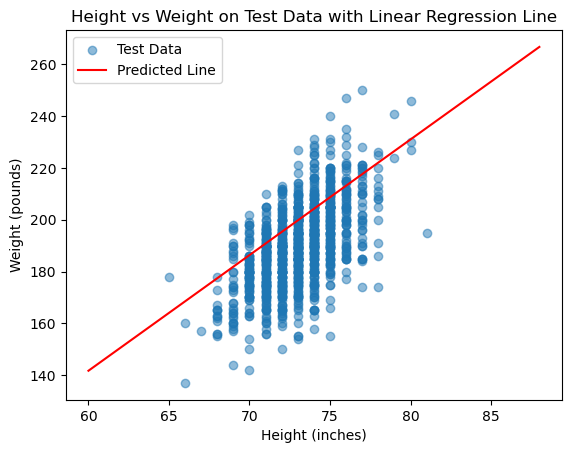

Out-of-sample R-squared: -0.0150


In [7]:
# Load test data
test_data = pd.read_csv('hockey_draftees_test.csv')

# Predictions
test_predictions = model.predict(test_data[['ht']])

# Scatter plot
plt.scatter(test_data['ht'], test_data['wt'], alpha=0.5, label='Test Data')
plt.plot(np.arange(60, 89), model.predict(np.arange(60, 89).reshape(-1, 1)), color='red', label='Predicted Line')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.legend()
plt.title('Height vs Weight on Test Data with Linear Regression Line')
plt.show()

# R-squared for OOS data
residuals_test = test_data['wt'] - test_predictions
ss_res_test = np.sum(residuals_test**2)
ss_tot_test = np.sum((test_data['wt'] - test_data['wt'].mean())**2)
r_squared_test = 1 - (ss_res_test/ss_tot_test)
print(f"Out-of-sample R-squared: {r_squared_test:.4f}")
